In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Processing

In [26]:
# Loading the Data from CSV file to pandas dataframe
car_dataset = pd.read_csv(r"C:\Users\hp\Downloads\car data.csv")

In [36]:
# Inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0,0


In [28]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
# Checking the distribution of categorical data
print (car_dataset.Fuel_Type.value_counts())
print (car_dataset.Selling_type.value_counts())
print (car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [46]:
#''' Encoading the catogarical data'''


#Encading "Fule_type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

#Encading "Selling_type" Column
car_dataset.replace({'Selling_type':{'Dealer':0, 'Individual':1}},inplace=True)

#Encading "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [47]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Spleating the data and Target

In [51]:
X = car_dataset.drop(['Car_Name'],axis=1)
Y = car_dataset['Selling_Price']

In [52]:
print(X)

     Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type Selling_type  \
0    2014           3.35           5.59       27000          0            0   
1    2013           4.75           9.54       43000          1            0   
2    2017           7.25           9.85        6900          0            0   
3    2011           2.85           4.15        5200          0            0   
4    2014           4.60           6.87       42450          1            0   
..    ...            ...            ...         ...        ...          ...   
296  2016           9.50          11.60       33988          1            0   
297  2015           4.00           5.90       60000          0            0   
298  2009           3.35          11.00       87934          0            0   
299  2017          11.50          12.50        9000          1            0   
300  2016           5.30           5.90        5464          0            0   

     Transmission  Owner  
0               0      0

In [53]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

### Model Training
### 1. Linear Regression

In [59]:
# loading the Linear Regression model
lin_reg_model = LinearRegression()


In [61]:
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evoluation

In [62]:
# pridiction on training data
training_data_pridiction = lin_reg_model.predict(X_train)

In [63]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_pridiction)
print('R square Error : ', error_score)

R square Error :  1.0


### Visualize the Actual and Predicted Price

<function matplotlib.pyplot.show(close=None, block=None)>

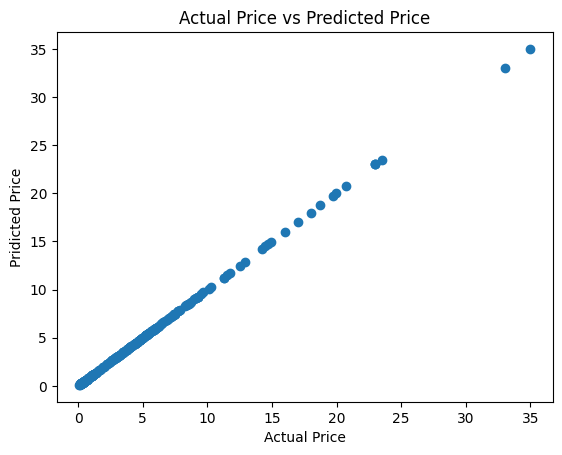

In [68]:
plt.scatter(Y_train, training_data_pridiction) 
plt.xlabel ("Actual Price") 
plt.ylabel("Pridicted Price") 
plt.title("Actual Price vs Predicted Price") 
plt.show


In [69]:
# pridiction on test data
test_data_pridiction = lin_reg_model.predict(X_test)

In [70]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pridiction)
print('R square Error : ', error_score)

R square Error :  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

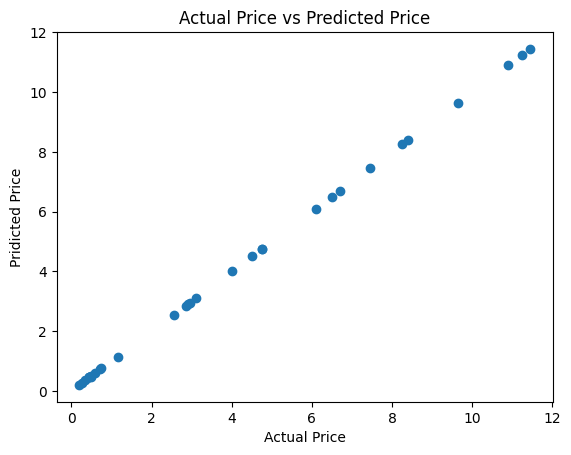

In [71]:
plt.scatter(Y_test, test_data_pridiction) 
plt.xlabel ("Actual Price") 
plt.ylabel("Pridicted Price") 
plt.title("Actual Price vs Predicted Price") 
plt.show


### 2. Lasso Regression

In [72]:
# loading the Lasso Regression model
lass_reg_model = Lasso()


In [73]:
lass_reg_model.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### Model Evoluation

In [74]:
# pridiction on training data
training_data_pridiction = lass_reg_model.predict(X_train)

In [75]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_pridiction)
print('R square Error : ', error_score)

R square Error :  0.9980900645935413


### Visualize the Actual and Predicted Price

<function matplotlib.pyplot.show(close=None, block=None)>

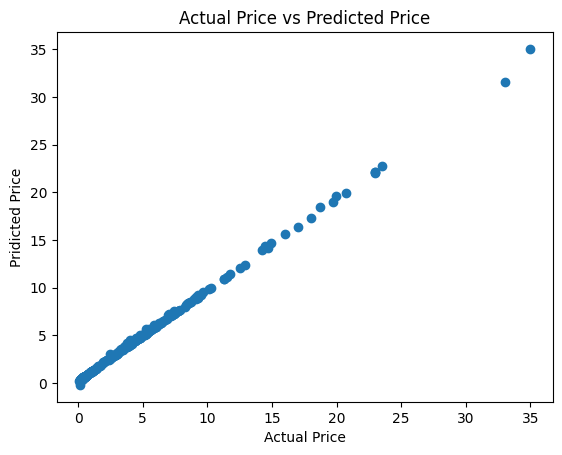

In [76]:
plt.scatter(Y_train, training_data_pridiction) 
plt.xlabel ("Actual Price") 
plt.ylabel("Pridicted Price") 
plt.title("Actual Price vs Predicted Price") 
plt.show


In [77]:
# pridiction on test data
test_data_pridiction = lass_reg_model.predict(X_test)

In [78]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pridiction)
print('R square Error : ', error_score)

R square Error :  0.9980729151045966


<function matplotlib.pyplot.show(close=None, block=None)>

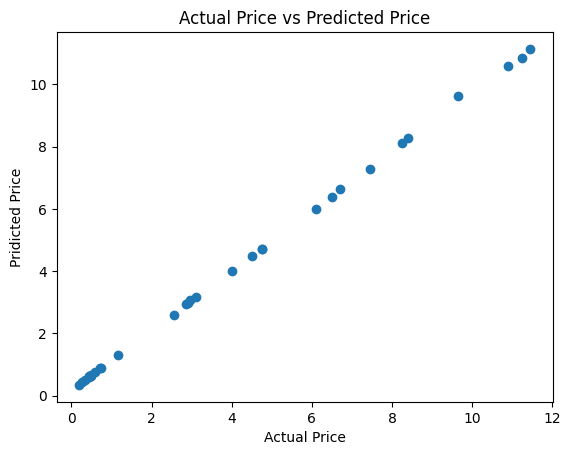

In [79]:
plt.scatter(Y_test, test_data_pridiction) 
plt.xlabel ("Actual Price") 
plt.ylabel("Pridicted Price") 
plt.title("Actual Price vs Predicted Price") 
plt.show
